## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import kruskal
import statsmodels.api as sm

## Load data

In [2]:
DATA_DIR = 'data/bank_data.csv'

df = pd.read_csv(DATA_DIR, index_col=0)

## Data Understanding

In [3]:
df.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
id,,,,,
2030,194,263.540,Level 0 Recovery,19,Male
1150,486,416.090,Level 0 Recovery,25,Female
380,527,429.350,Level 0 Recovery,27,Male
1838,536,296.990,Level 0 Recovery,25,Male
1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.describe()

,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000
mean,2759.967588,4000.967837,39.650372
std,2019.826565,4576.506350,15.453072
min,194.000000,200.425000,18.000000
25%,1261.250000,1045.190300,28.000000
50%,2062.000000,2115.446373,35.000000
75%,3569.500000,5417.237207,50.000000
max,9964.000000,34398.479710,84.000000


In [5]:
df.describe(include='object')

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 2030 to 522
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   expected_recovery_amount  1882 non-null   int64  
 1   actual_recovery_amount    1882 non-null   float64
 2   recovery_strategy         1882 non-null   object 
 3   age                       1882 non-null   int64  
 4   sex                       1882 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 88.2+ KB


In [7]:
df.isna().sum()

expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [8]:
df.duplicated().sum()

0

## EDA

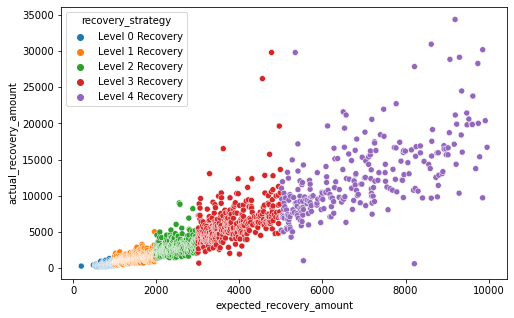

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=df,hue='recovery_strategy')
plt.show()

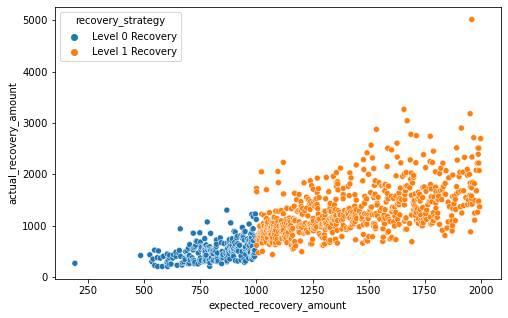

In [10]:
# level 0 and 1 recovery only
plt.figure(figsize=(8,5))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=df[df['recovery_strategy'].isin(['Level 0 Recovery', 'Level 1 Recovery'])],hue='recovery_strategy')
plt.show()

In [11]:
#drop the first row (outlier)
df.drop(2030, inplace=True)

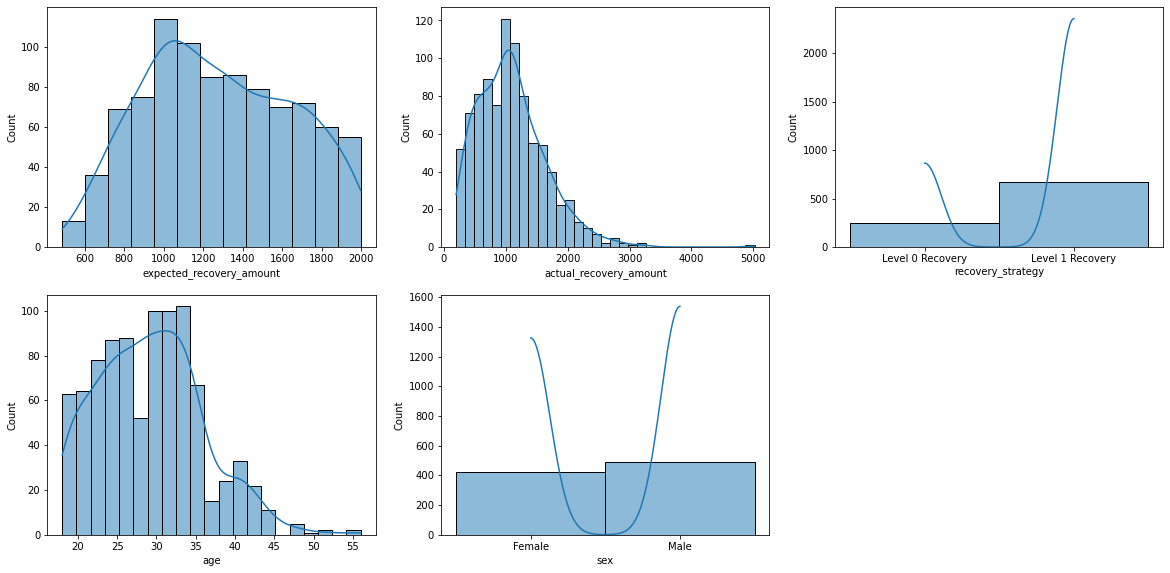

In [12]:
# features distibution of level 0 and 1 recovery
plt.figure(figsize=(20, 15))

for i, c in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[df['expected_recovery_amount'] < 2000][c], kde=True)

plt.show()

### does the customer age show a jump (discontinuity) at the 1000 threshold or does that age vary smoothly?

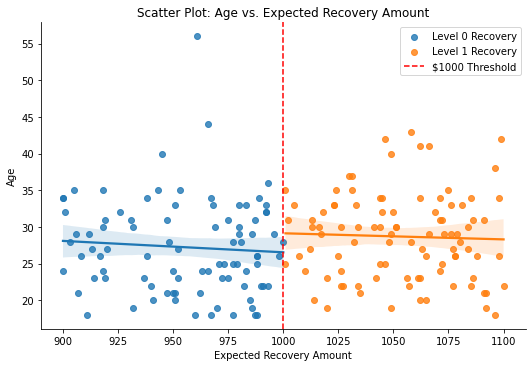

In [13]:
sns.lmplot(y='age', x='expected_recovery_amount', data=df[df['expected_recovery_amount'].between(900, 1100)], hue='recovery_strategy', legend=False, height=5, aspect=1.5)
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot: Age vs. Expected Recovery Amount')
plt.legend()
plt.show()

- The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around $1000.

#### Statistical analysis

In [14]:
below_threshold = df[df['expected_recovery_amount'].between(900, 1000)]['age']
above_threshold = df[df['expected_recovery_amount'].between(1001, 1100)]['age']

statistics, p_value = kruskal(above_threshold, below_threshold)

alpha = 0.05

if p_value < alpha:
    print("There is a significant discontinuity in recovery amounts.")
else:
    print("There is no significant discontinuity in recovery amounts.")

There is no significant discontinuity in recovery amounts.


### does the customer sex show a jump (discontinuity) at the 1000 threshold or does that sex vary smoothly?

In [15]:
above_threshold = df[df['expected_recovery_amount'].between(1001,1100)]['sex'].value_counts()
below_threshold

id
520     34
1036    34
1383    24
998     32
1351    28
        ..
618     22
1779    36
1963    29
391     26
206     28
Name: age, Length: 89, dtype: int64

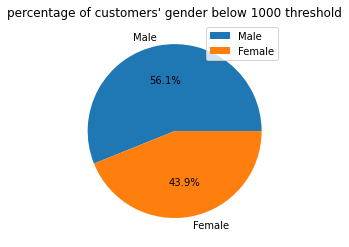

In [16]:
below_threshold = df[df['expected_recovery_amount'].between(1,1000)]['sex'].value_counts()

plt.pie(below_threshold.values, labels=below_threshold.index, autopct='%1.1f%%')
plt.legend()
plt.title("percentage of customers' gender below 1000 threshold")
plt.show()

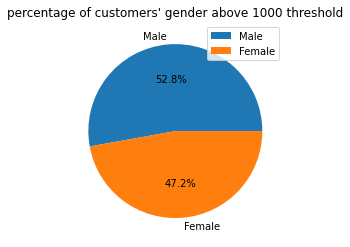

In [17]:
above_threshold = df[df['expected_recovery_amount'].between(1001,2000)]['sex'].value_counts()

plt.pie(above_threshold.values, labels=above_threshold.index, autopct='%1.1f%%')
plt.legend()
plt.title("percentage of customers' gender above 1000 threshold")
plt.show()

- The percentage of gender did not show an obvious jump around $1000.

#### Statistical analysis

In [18]:
below_threshold = df[df['expected_recovery_amount'].between(900, 1000)]['sex']
above_threshold = df[df['expected_recovery_amount'].between(1001, 1100)]['sex']

_, p_value = kruskal(above_threshold, below_threshold)

alpha = 0.05

if p_value < alpha:
    print("There is a significant discontinuity in recovery amounts.")
else:
    print("There is no significant discontinuity in recovery amounts.")

There is no significant discontinuity in recovery amounts.


### Relationship between the actual recovery amount and the expected recovery amount

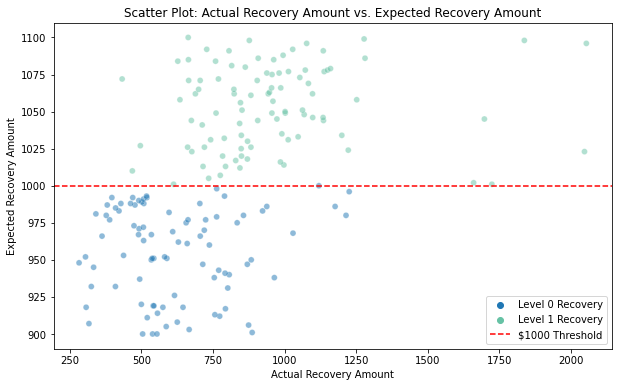

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_recovery_amount', y='expected_recovery_amount', data=df[df['expected_recovery_amount'].between(900, 1000)], hue='recovery_strategy', alpha=0.5)
sns.scatterplot(x='actual_recovery_amount', y='expected_recovery_amount', data=df[df['expected_recovery_amount'].between(1001, 1100)], hue='recovery_strategy', palette='Set2', alpha=0.5)
plt.axhline(y=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.title('Scatter Plot: Actual Recovery Amount vs. Expected Recovery Amount')
plt.legend()
# plt.grid(True)
plt.show()

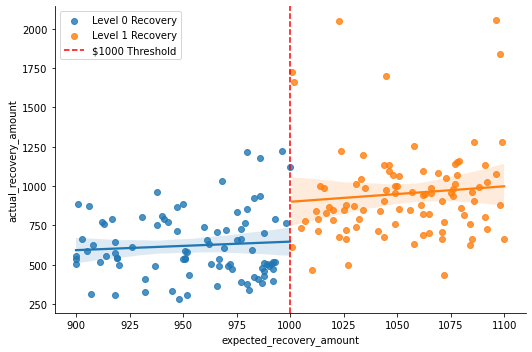

In [20]:
sns.lmplot(y='actual_recovery_amount', x='expected_recovery_amount', data=df[df['expected_recovery_amount'].between(900, 1100)], hue='recovery_strategy', legend=False, height=5, aspect=1.5)
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()

- There is significant discontinuity around the threshold

#### Statistical analysis

In [21]:

below_threshold = df[df['expected_recovery_amount'].between(900, 1000)]['actual_recovery_amount']
above_threshold = df[df['expected_recovery_amount'].between(1001, 1100)]['actual_recovery_amount']

_, p_value = kruskal(above_threshold, below_threshold)

alpha = 0.05

if p_value < alpha:
    print("There is a significant discontinuity in recovery amounts.")
else:
    print("There is no significant discontinuity in recovery amounts.")

There is a significant discontinuity in recovery amounts.


## Regression modeling 

In [22]:
train_data = df[df['expected_recovery_amount'].between(900, 1100)].copy()

### Regression modeling: no threshold

In [23]:
x1 = train_data.drop(['sex', 'age', 'actual_recovery_amount', 'recovery_strategy'], axis=1)

x2 = x1.copy()
x2['above_threshold'] = (x2['expected_recovery_amount'] > 1000).astype(int)

y = train_data['actual_recovery_amount']

In [24]:
x1 = sm.add_constant(x1)

model = sm.OLS(y, x1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           3.65e-13
Time:                            23:19:40   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1918.4549    346.395     -5.538      0.000   -2601.920   -1234.989
expected_recovery_amount     2.6956      0.344      7.841      0.000       2.017       3.374
==============================================================================
Omnibus:                       64.512   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.639
Skew:                           1.457   Prob(JB):                     4.89e-41
Kurtosis:                       6.965   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

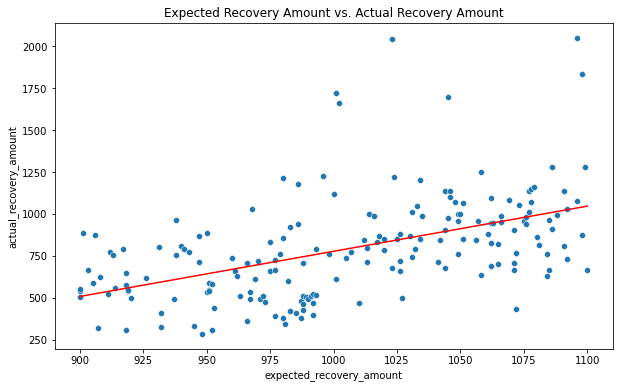

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=train_data)
plt.plot(x1['expected_recovery_amount'], model.fittedvalues, color='red')
plt.title("Expected Recovery Amount vs. Actual Recovery Amount")
plt.show()

### Regression modeling: adding true threshold

In [26]:
x2 = sm.add_constant(x2)

model = sm.OLS(y, x2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           1.22e-14
Time:                            23:19:41   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -93.8215    629.410     -0.149      0.882   -1335.746    1148.103
expected_recovery_amount     0.7502      0.658      1.140      0.256      -0.548       2.049
above_threshold            256.3424     74.720      3.431      0.001     108.907     403.777
==============================================================================
Omnibus:                       65.379   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.703
Skew:                           1.502   Prob(JB):                     9.51e-40
Kurtosis:                       6.796   Cond. No.                     3.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

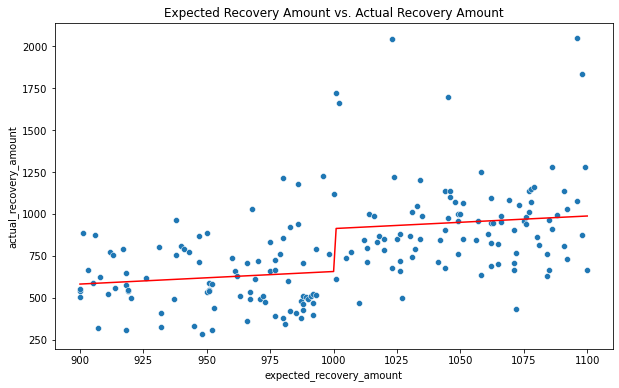

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=train_data)
plt.plot(x2['expected_recovery_amount'], model.fittedvalues, color='red')
plt.title("Expected Recovery Amount vs. Actual Recovery Amount")
plt.show()

- As we see the model's accuracy increases after adding the true threshold

## Regression modeling with smaller range of data

In [28]:
train_data = df[df['expected_recovery_amount'].between(950, 1050)].copy()

x1 = train_data.drop(['sex', 'age', 'actual_recovery_amount', 'recovery_strategy'], axis=1)

x2 = x1.copy()
x2['above_threshold'] = (x2['expected_recovery_amount'] > 1000).astype(int)

y = train_data['actual_recovery_amount']

### Regression modeling: no threshold

In [29]:
x1 = sm.add_constant(x1)

model = sm.OLS(y, x1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.238
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     30.64
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           2.60e-07
Time:                            23:19:41   Log-Likelihood:                -702.76
No. Observations:                     100   AIC:                             1410.
Df Residuals:                          98   BIC:                             1415.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4365.0780    928.299     -4.702      0.000   -6207.257   -2522.899
expected_recovery_amount     5.1385      0.928      5.535      0.000       3.296       6.981
==============================================================================
Omnibus:                       45.225   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.157
Skew:                           1.694   Prob(JB):                     2.68e-25
Kurtosis:                       6.960   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

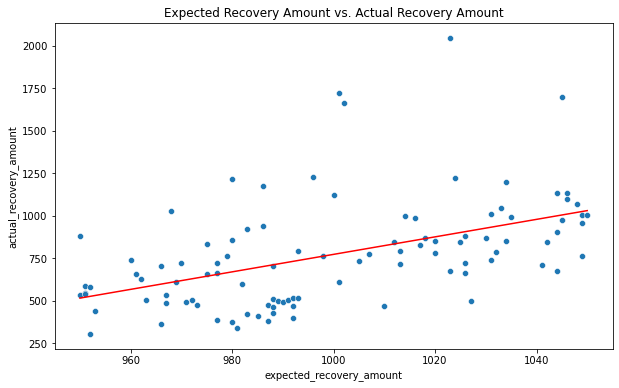

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=train_data)
plt.plot(x1['expected_recovery_amount'], model.fittedvalues, color='red')
plt.title("Expected Recovery Amount vs. Actual Recovery Amount")
plt.show()

### Regression modeling: with threshold

In [31]:
x2 = sm.add_constant(x2)

model = sm.OLS(y, x2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           2.42e-07
Time:                            23:19:41   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1102.7036   1840.645     -0.599      0.551   -4755.875    2550.468
expected_recovery_amount     1.7713      1.885      0.939      0.350      -1.971       5.513
above_threshold            229.6714    112.491      2.042      0.044       6.408     452.935
==============================================================================
Omnibus:                       39.950   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.782
Skew:                           1.581   Prob(JB):                     6.41e-19
Kurtosis:                       6.179   Cond. No.                     6.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

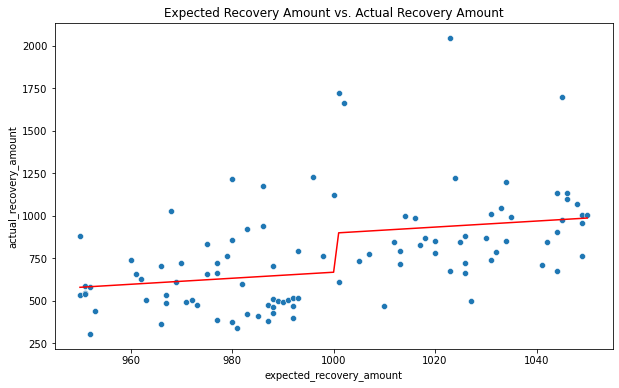

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=train_data)
plt.plot(x2['expected_recovery_amount'], model.fittedvalues, color='red')
plt.title("Expected Recovery Amount vs. Actual Recovery Amount")
plt.show()

-  As we see we get almost similar results